# Additional Cleaning and EDA

### Contents - 
- 01 Import libraries and data 
- 02 Data wrangling 
- 03 Data cleaning
- 04 EDA



# 01 Importing libraries and data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json 

In [3]:
%matplotlib inline

In [4]:
path = r'//Users/amypalomino/Documents/June 22 Final Project'

In [5]:
# Import json file for global locations

country_geo = r'//Users/amypalomino/Documents/June 22 Final Project/02 Data/Original Data/custom.geo.json'

In [6]:
# Import natural disaster data
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Natural_Disasters_Final_Clean_Final.csv'),index_col = False)

In [7]:
df.shape

(14644, 46)

In [8]:
df.head()

,Unnamed: 0,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,Date,Count,No_of_disasters,disaster_frequency
0,0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,...,0.0,0.0,0.0,25000.0,15.001282,Low Death Toll,1970-01-04,1,119,Frequent
1,1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,0.0,0.0,0.0,72475.0,15.001282,Low Death Toll,1970-01-15,1,240,Frequent
2,2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,...,0.0,0.0,0.0,200.0,15.001282,0,1970-09-15,1,51,Infrequent
3,3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,3648000.0,0.0,0.0,86400.0,15.001282,Very High Death Toll,1970-11-12,1,317,Very frequent
4,4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,...,110.0,0.0,0.0,0.0,15.001282,Low Death Toll,1970-04-13,1,317,Very frequent


In [9]:
# Drop Unnamed column
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
# Enable max columns to be displayed 

pd.options.display.max_columns = None

In [11]:
df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,Date,Count,No_of_disasters,disaster_frequency
0,1970-0013-ARG,1970,13,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,25000.0,15.001282,Low Death Toll,1970-01-04,1,119,Frequent
1,1970-0109-AUS,1970,109,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,1.0,15.0,1970,1.0,NaN,13.0,0.0,0.0,0.0,0.0,0.0,0.0,72475.0,15.001282,Low Death Toll,1970-01-15,1,240,Frequent
2,1970-0044-BEN,1970,44,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Km2,NaN,NaN,1970,9.0,15.0,1970,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,15.001282,0,1970-09-15,1,51,Infrequent
3,1970-0063-BGD,1970,63,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,0.0,3648000.0,0.0,3648000.0,0.0,0.0,86400.0,15.001282,Very High Death Toll,1970-11-12,1,317,Very frequent
4,1970-0026-BGD,1970,26,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,0.0,110.0,0.0,110.0,0.0,0.0,0.0,15.001282,Low Death Toll,1970-04-13,1,317,Very frequent


# 02 Data Cleaning 

In [13]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Benin', 'Bangladesh', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'China',
       'Côte d’Ivoire', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus',
       'Dominica', 'Ecuador', 'Ethiopia', 'France', 'Guadeloupe',
       'Hong Kong', 'Hungary', 'Indonesia', 'India', 'Chile',
       'Afghanistan', 'Belgium', 'Cameroon', 'Spain', 'Ghana', 'Guyana',
       'Honduras', 'Germany Fed Rep', 'Fiji',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'Haiti', 'Central African Republic', 'Algeria', 'Gambia (the)',
       'Guatemala', 'Belize', 'Bolivia (Plurinational State of)',
       'Czechoslovakia', 'Austria', 'Egypt', 'Grenada', 'Burkina Faso',
       'Denmark', 'Guam', 'Bulgaria', 'Comoros (the)', 'Djibouti',
       'Greece', 'Burundi', 'Bahrain', 'Peru', 'Papua New Guinea',
       'Iran (Islamic Republic of)', 'Israel', 'Italy',
       'Korea (the Republic of)', 'Morocco', 'Madagascar', 'Mexico',
       'Myanmar',

In [14]:
df.loc[df['Country'] == 'United Kingdom of Great Britain and Northern Ireland (the)', 'Country'] = 'United Kingdom'

In [15]:
df.loc[df['Country'] == 'United States of America (the)', 'Country'] = 'United States'

In [16]:
df.loc[df['Country'] == 'Philippines (the)', 'Country'] = 'Philippines'

In [17]:
df.loc[df['Country'] == 'Russian Federation (the)', 'Country'] = 'Russia'

In [18]:
df.loc[df['Country'] == 'Venezuela (Bolivarian Republic of)', 'Country'] = 'Venezuela'

In [19]:
df.loc[df['Country'] == 'Taiwan (Province of China)', 'Country'] = 'Taiwan'

In [20]:
df.loc[df['Country'] == 'Netherlands (the)', 'Country'] = 'Netherlands'

In [21]:
df.loc[df['Country'] == 'Korea (the Republic of)', 'Country'] = 'South Korea'

In [22]:
df.loc[df['Country'] == 'Czech Republic (the)', 'Country'] = 'Czech Rep'

In [23]:
df.loc[df['Country'] == 'Moldova (the Republic of)', 'Country'] = 'Moldova'

In [24]:
df.loc[df['Country'] == 'Dominican Republic (the)', 'Country'] = 'Dominican Republic'

In [25]:
df.loc[df['Country'] == "Korea (the Democratic People's Republic of)", 'Country'] = 'North Korea'

In [26]:
df.loc[df['Country'] == 'Congo (the)', 'Country'] = 'Congo'

In [27]:
df.loc[df['Country'] == 'Congo (the Democratic Republic of the)', 'Country'] = 'Dem. Rep. Congo'

In [28]:
df.loc[df['Country'] == 'Niger (the)', 'Country'] = 'Niger'

In [29]:
df.loc[df['Country'] == 'Sudan (the)', 'Country'] = 'Sudan'

In [30]:
df.loc[df['Country'] == 'Iran (Islamic Republic of)', 'Country'] = 'Iran'

In [31]:
df.loc[df['Country'] == 'Bolivia (Plurinational State of)', 'Country'] = 'Bolivia'

In [32]:
df.loc[df['Country'] == 'Gambia (the)', 'Country'] = 'Gambia'

In [33]:
df.loc[df['Country'] == "Lao People's Democratic Republic (the)", 'Country'] = 'Lao PDR'

In [34]:
df.loc[df['Country'] == 'United Arab Emirates (the)', 'Country'] = 'United Arab Emirates'

In [35]:
df['Country'].unique()

array(['Argentina', 'Australia', 'Benin', 'Bangladesh', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'China',
       'Côte d’Ivoire', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus',
       'Dominica', 'Ecuador', 'Ethiopia', 'France', 'Guadeloupe',
       'Hong Kong', 'Hungary', 'Indonesia', 'India', 'Chile',
       'Afghanistan', 'Belgium', 'Cameroon', 'Spain', 'Ghana', 'Guyana',
       'Honduras', 'Germany Fed Rep', 'Fiji', 'United Kingdom', 'Haiti',
       'Central African Republic', 'Algeria', 'Gambia', 'Guatemala',
       'Belize', 'Bolivia', 'Czechoslovakia', 'Austria', 'Egypt',
       'Grenada', 'Burkina Faso', 'Denmark', 'Guam', 'Bulgaria',
       'Comoros (the)', 'Djibouti', 'Greece', 'Burundi', 'Bahrain',
       'Peru', 'Papua New Guinea', 'Iran', 'Israel', 'Italy',
       'South Korea', 'Morocco', 'Madagascar', 'Mexico', 'Myanmar',
       'Martinique', 'Malaysia', 'Niger', 'Nepal', 'Panama',
       'Philippines', 'Puerto Rico', 'Romania', 'Turkey', 'United St

In [36]:
df.loc[df['Country'] == 'Germany Fed Rep', 'Country'] = 'Germany'

In [37]:
df.loc[df['Country'] == 'Bahamas (the)', 'Country'] = 'Bahamas'

In [38]:
df.loc[df['Country'] == 'Macedonia (the former Yugoslav Republic of)', 'Country'] = 'Macedonia'

In [39]:
df.loc[df['Country'] == 'Syrian Arab Republic', 'Country'] = 'Syria'

In [40]:
df.loc[df['Country'] == 'Palestine, State of,' 'Country'] = 'Palestine'

In [41]:
df.loc[df['Country'] == 'Germany Dem Rep', 'Country'] = 'Germany'

In [42]:
df.loc[df['Country'] == 'Tanzania, United Republic of', 'Country'] = 'Tanzania'

In [43]:
df.loc[df['Country'] == 'South Sudan', 'Country'] = 'S. Sudan'

In [44]:
df.loc[df['Country'] == 'Viet Nam', 'Country'] = 'Vietnam'

In [45]:
df.loc[df['Country'] == 'Soviet Union', 'Country'] = 'Russia'

In [46]:
df.loc[df['Country'] == 'Dominican Republic', 'Country'] = 'Dominican Rep'

In [47]:
# Number of missing values 

df.isnull().sum()

Dis No                          0
Year                            0
Seq                             0
Disaster Group                  0
Disaster Subgroup               0
Disaster Type                   0
Disaster Subtype             2747
Disaster Subsubtype         13600
Event Name                  10999
Country                         0
ISO                             0
Region                          0
Continent                       0
Location                     1346
Origin                      10864
Associated Dis              11412
Associated Dis2             13946
OFDA Response                   0
Appeal                          0
Declaration                     0
Aid Contribution                0
Dis Mag Value                   0
Dis Mag Scale                1073
Latitude                    12313
Longitude                   12309
Start Year                      0
Start Month                     0
Start Day                       0
End Year                        0
End Month     

In [49]:
dups = df.duplicated()

In [50]:
dups.shape # no duplicates

(14644,)

# 03 Data Wrangling

In [12]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
       'Reconstruction Costs US$', 'Insured Damages US$', 'Total Damages US$',
       'CPI', 'Deaths', 'Date', 'Count', 'No_of_disasters',
       'disaster_frequency'],
      dtype='object')

In [52]:
# Create subset 

columns = ['Year', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 
           'Country', 'ISO', 'Region', 'Continent', 'OFDA Response',
           'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
         'Total Deaths','No Injured', 'CPI',
         'No Homeless', 'Total Affected', 'Deaths','No_of_disasters',
       'disaster_frequency']

# Create a subet 

country_rec = df[columns]

In [53]:
country_rec.shape

(14644, 21)

In [55]:
country_rec.head()

,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Total Deaths,No Injured,CPI,No Homeless,Total Affected,Deaths,No_of_disasters,disaster_frequency
0,1970,Hydrological,Flood,NaN,Argentina,ARG,South America,Americas,0.0,0.0,0.0,0.0,0.0,36.0,0.0,15.001282,0.0,0.0,Low Death Toll,119,Frequent
1,1970,Meteorological,Storm,Tropical cyclone,Australia,AUS,Australia and New Zealand,Oceania,0.0,0.0,0.0,0.0,0.0,13.0,0.0,15.001282,0.0,0.0,Low Death Toll,240,Frequent
2,1970,Hydrological,Flood,NaN,Benin,BEN,Western Africa,Africa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.001282,0.0,0.0,0,51,Infrequent
3,1970,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,1.0,0.0,0.0,0.0,0.0,300000.0,0.0,15.001282,0.0,3648000.0,Very High Death Toll,317,Very frequent
4,1970,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,0.0,0.0,0.0,0.0,0.0,17.0,0.0,15.001282,0.0,110.0,Low Death Toll,317,Very frequent


<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

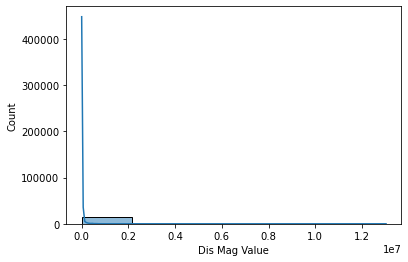

In [56]:
sns.histplot(country_rec['Dis Mag Value'],bins = 6, kde = True)

In [57]:
country_rec[country_rec['Dis Mag Value'] > 5000]

,Year,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Total Deaths,No Injured,CPI,No Homeless,Total Affected,Deaths,No_of_disasters,disaster_frequency
106,1973,Hydrological,Flood,NaN,Ecuador,ECU,South America,Americas,0.0,0.0,0.0,0.0,15000.0,0.0,0.0,17.15536,30000.0,30000.0,0,95,Infrequent
123,1974,Climatological,Drought,Drought,Australia,AUS,Australia and New Zealand,Oceania,0.0,0.0,0.0,0.0,45000.0,0.0,0.0,19.051854,0.0,0.0,0,240,Frequent
785,1980,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,0.0,0.0,0.0,0.0,12140.0,0.0,0.0,31.841107,0.0,0.0,0,906,Extremely frequent
1048,1985,Hydrological,Flood,Riverine flood,Argentina,ARG,South America,Americas,0.0,0.0,0.0,0.0,78650.0,25.0,0.0,41.561827,0.0,1000000.0,Low Death Toll,119,Frequent
1049,1985,Hydrological,Flood,NaN,Argentina,ARG,South America,Americas,1.0,0.0,0.0,0.0,64000.0,12.0,0.0,41.561827,56000.0,206000.0,Low Death Toll,119,Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14526,2020,Hydrological,Flood,NaN,Uzbekistan,UZB,Central Asia,Asia,0.0,0.0,0.0,0.0,84662.0,4.0,50.0,100.0,0.0,70050.0,Low Death Toll,9,Infrequent
14540,2020,Hydrological,Flood,Flash flood,Uruguay,URY,South America,Americas,0.0,0.0,0.0,0.0,112272.0,0.0,0.0,100.0,0.0,360.0,0,33,Infrequent
14560,2020,Hydrological,Flood,NaN,Ukraine,UKR,Eastern Europe,Europe,0.0,0.0,0.0,0.0,33791.0,3.0,0.0,100.0,0.0,55000.0,Low Death Toll,39,Infrequent
14576,2020,Hydrological,Flood,Flash flood,Yemen,YEM,Western Asia,Asia,0.0,0.0,0.0,0.0,18949.0,10.0,30.0,100.0,0.0,150030.0,Low Death Toll,55,Infrequent


In [58]:
df['Dis Mag Scale'].value_counts()

Km2           6409
Kph           4005
Vaccinated    1436
Richter       1137
°C             584
Name: Dis Mag Scale, dtype: int64

In [59]:
df.groupby('Dis Mag Scale').agg({'Dis Mag Value':['mean','max','min']})

Dis Mag Value                  
                       mean         max   min
Dis Mag Scale                                
Km2            26156.257606   2857000.0   0.0
Kph               44.396504       400.0   0.0
Richter            6.139754         9.0   0.0
Vaccinated     38446.807799  13025874.0   0.0
°C                 3.859589        60.0 -57.0

Becasue there are several scales being used to count the value, this variable can't really be assessed for outliers when aggreagted 

In [60]:
Km2 = df[df['Dis Mag Scale'] == 'Km2']

<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

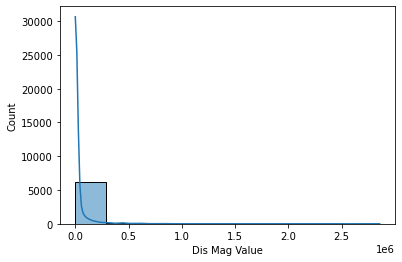

In [61]:
sns.histplot(Km2['Dis Mag Value'],bins = 10, kde = True)

In [62]:
Km2[Km2['Dis Mag Value'] >2000]

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,Date,Count,No_of_disasters,disaster_frequency
106,1973-0111-ECU,1973,111,Natural,Hydrological,Flood,NaN,NaN,NaN,Ecuador,ECU,South America,Americas,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,15000.0,Km2,NaN,NaN,1973,2.0,15.0,1973,2.0,NaN,0.0,0.0,0.0,30000.0,30000.0,0.0,0.0,0.0,17.15536,0,1973-02-15,1,95,Infrequent
123,1974-9100-AUS,1974,9100,Natural,Climatological,Drought,Drought,NaN,NaN,Australia,AUS,Australia and New Zealand,Oceania,Central New South Wales,NaN,NaN,NaN,0.0,0.0,0.0,0.0,45000.0,Km2,NaN,NaN,1974,12.0,15.0,1975,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.051854,0,1974-12-15,1,240,Frequent
371,1971-0116-IND,1971,116,Natural,Hydrological,Flood,NaN,NaN,NaN,India,IND,Southern Asia,Asia,"Brahmaputra, Dhemaji, North Lakhimpur, Jorhat,...",NaN,NaN,NaN,0.0,0.0,0.0,0.0,2600.0,Km2,NaN,NaN,1971,6.0,15.0,1971,6.0,NaN,0.0,0.0,130000.0,0.0,130000.0,0.0,0.0,0.0,15.645257,0,1971-06-15,1,658,Extremely frequent
785,1980-0247-CHN,1980,247,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,China,CHN,Eastern Asia,Asia,"Hubei province, West Shangai",NaN,NaN,NaN,0.0,0.0,0.0,0.0,12140.0,Km2,NaN,NaN,1980,9.0,2.0,1980,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.841107,0,1980-09-02,1,906,Extremely frequent
1048,1985-0165-ARG,1985,165,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Argentina,ARG,South America,Americas,"Berisso, Moron, Avellaneda, San Martin, La Pla...",NaN,NaN,NaN,0.0,0.0,0.0,0.0,78650.0,Km2,NaN,NaN,1985,5.0,30.0,1985,5.0,30.0,25.0,0.0,1000000.0,0.0,1000000.0,0.0,0.0,230000.0,41.561827,Low Death Toll,1985-05-30,1,119,Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14512,2019-0609-VEN,2019,609,Natural,Hydrological,Flood,NaN,NaN,NaN,Venezuela,VEN,South America,Americas,Zulia State,Heavy rains,NaN,NaN,0.0,0.0,0.0,0.0,24681.0,Km2,9.772,-72.228,2019,10.0,5.0,2019,10.0,15.0,6.0,0.0,2000.0,0.0,2000.0,0.0,0.0,0.0,98.781448,Low Death Toll,2019-10-05,1,56,Infrequent
14526,2020-0157-UZB,2020,157,Natural,Hydrological,Flood,NaN,NaN,NaN,Uzbekistan,UZB,Central Asia,Asia,Syrdarya region,NaN,Broken Dam/Burst bank,Storm,0.0,0.0,0.0,0.0,84662.0,Km2,412.451,55.844,2020,5.0,1.0,2020,5.0,11.0,4.0,50.0,70000.0,0.0,70050.0,0.0,0.0,0.0,100.0,Low Death Toll,2020-05-01,1,9,Infrequent
14540,2020-0301-URY,2020,301,Natural,Hydrological,Flood,Flash flood,NaN,NaN,Uruguay,URY,South America,Americas,"Montevideo, Lavalleja, Colonia, Canelones",Heavy rains,Storm,NaN,0.0,0.0,0.0,0.0,112272.0,Km2,-331.035,-560.461,2020,6.0,22.0,2020,6.0,24.0,0.0,0.0,360.0,0.0,360.0,0.0,0.0,0.0,100.0,0,2020-06-22,1,33,Infrequent
14560,2020-0283-UKR,2020,283,Natural,Hydrological,Flood,NaN,NaN,NaN,Ukraine,UKR,Eastern Europe,Europe,Verkhovyna District (Ivano-Frankivsk); Vyzhnyt...,Heavy rains,NaN,NaN,0.0,0.0,0.0,0.0,33791.0,Km2,492.688,23.628,2020,6.0,22.0,2020,6.0,29.0,3.0,0.0,55000.0,0.0,55000.0,0.0,0.0,153861.0,100.0,Low Death Toll,2020-06-22,1,39,Infrequent


In [63]:
df.groupby('Dis Mag Scale').agg({'Dis Mag Value':['median']})

,Dis Mag Value
,median
Dis Mag Scale,
Km2,0.0
Kph,0.0
Richter,6.0
Vaccinated,0.0
°C,0.0


In [64]:
Richter = df[df['Dis Mag Scale'] == 'Richter']

<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

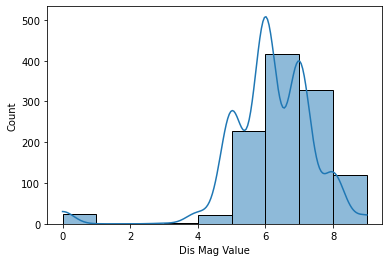

In [65]:
sns.histplot(Richter['Dis Mag Value'],bins = 9, kde = True)

In [66]:
Vaccinated = df[df['Dis Mag Scale'] == 'Vaccinated']

<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

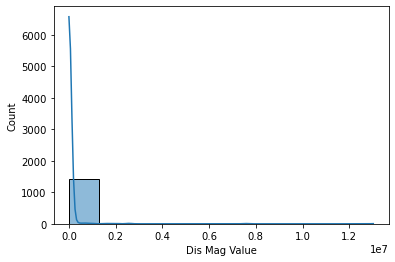

In [67]:
sns.histplot(Vaccinated['Dis Mag Value'],bins = 10, kde = True)

In [68]:
C = df[df['Dis Mag Scale'] == '°C']

<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

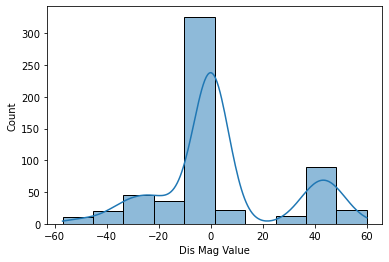

In [69]:
sns.histplot(C['Dis Mag Value'],bins = 10, kde = True)

In [70]:
Kph = df[df['Dis Mag Scale'] == 'Kph']

<AxesSubplot:xlabel='Dis Mag Value', ylabel='Count'>

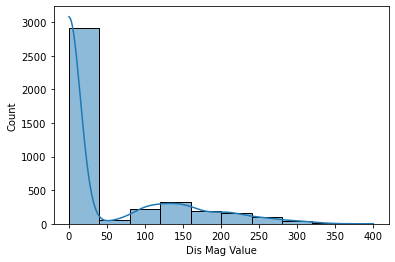

In [71]:
sns.histplot(Kph['Dis Mag Value'],bins = 10, kde = True)

<AxesSubplot:xlabel='Disaster Type', ylabel='Count'>

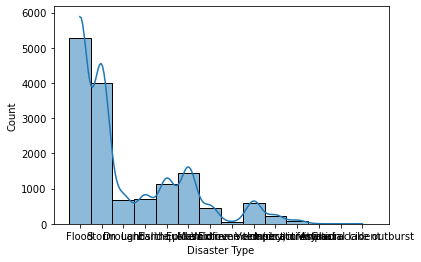

In [75]:
sns.histplot(df['Disaster Type'],bins = 5, kde = True)

In [78]:
df['Continent'].unique()

array(['Americas', 'Oceania', 'Africa', 'Asia', 'Europe'], dtype=object)

In [79]:
df.loc[df['Continent'] == 'Americas', 'Continent'] = 'America'

In [82]:
crosstab = pd.crosstab(df['Continent'],df['Country'], dropna = False)
crosstab

Country,Afghanistan,Albania,Algeria,American Samoa,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Azores Islands,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Canary Is,Cayman Islands (the),Central African Republic,Chad,Chile,China,Colombia,Comoros (the),Congo,Cook Islands (the),Costa Rica,Croatia,Cuba,Cyprus,Czech Rep,Czechoslovakia,Côte d’Ivoire,Dem. Rep. Congo,Denmark,Djibouti,Dominica,Dominican Rep,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao PDR,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macao,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Marshall Islands (the),Martinique,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),Moldova,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,North Korea,Northern Mariana Islands (the),Norway,Oman,Pakistan,Palau,"Palestine, State of",Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russia,Rwanda,Réunion,S. Sudan,Saint Barthélemy,"Saint Helena, Ascension and Tristan da Cunha",Saint Kitts and Nevis,Saint Lucia,Saint Martin (French Part),Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Serbia Montenegro,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands (the),Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Virgin Island (British),Virgin Island (U.S.),Wallis and Futuna,Yemen,Yemen Arab Rep,Yemen P Dem Rep,Yugoslavia,Zambia,Zimbabwe
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,77,0,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,21,0,0,0,59,62,15,0,54,0,0,0,44,60,0,0,0,23,33,0,0,0,0,0,0,0,30,138,0,26,0,0,0,31,0,1,8,0,116,0,0,0,0,0,13,30,0,0,52,0,0,0,0,0,38,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119,0,0,0,0,0,0,24,24,3,0,0,0,0,88,70,0,0,57,0,0,43,21,0,0,0,0,0,0,50,115,0,32,0,0,0,0,0,0,92,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,13,25,0,1,0,0,0,0,0,4,0,48,0,0,7,32,0,0,0,0,0,97,105,0,0,0,99,0,18,0,0,0,0,0,110,0,0,28,0,0,0,20,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,51
America,0,0,0,0,0,6,10,119,0,0,0,0,0,20,0,0,12,0,0,19,0,5,0,96,0,0,227,0,0,0,0,0,0,0,121,0,7,0,0,97,0,188,0,0,0,68,0,76,0,0,0,0,0,0,0,13,76,95,0,66,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,6,13,0,115,0,0,12,117,85,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,262,0,0,0,0,7,0,0,0,0,0,0,2,0,0,77,0,0,0,0,0,0,0,0,0,0,59,0,56,178,0,0,0,33,0,0,0,0,0,0,1,0,8,18,1,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,7,0,0,0,0,0,949,33,0,0,56,0,4,8,0,0,0,0,0,0,0
Asia,200,0,0,0,0,0,0,0,11,0,0,15,0,0,1,317,0,0,0,0,0,0,12,0,0,0,0,1,0,0,0,0,42,0,0,0,0,0,0,0,906,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,108,0,0,658,528,205,23,0,0,19,0,0,272,14,25,0,0,3,31,51,0,12,0,0,0,0,0,7,0,0,0,93,8,0,0,0,0,0,0,0,0,37,0,0,0,0,69,0,123,0,0,0,0,0,0,0,0,47,0,0,16,213,0

In [83]:
df_cont = df[df['Continent'] == 'America']

In [88]:
df_cont['Country'].unique()

array(['Argentina', 'Brazil', 'Barbados', 'Canada', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominica', 'Ecuador', 'Guadeloupe', 'Chile',
       'Guyana', 'Honduras', 'Haiti', 'Guatemala', 'Belize', 'Bolivia',
       'Grenada', 'Peru', 'Mexico', 'Martinique', 'Panama', 'Puerto Rico',
       'United States', 'Nicaragua', 'Paraguay', 'Jamaica',
       'Trinidad and Tobago', 'Saint Vincent and the Grenadines',
       'Venezuela', 'Dominican Rep', 'Anguilla', 'Antigua and Barbuda',
       'Bermuda', 'Bahamas', 'Saint Lucia', 'Saint Kitts and Nevis',
       'El Salvador', 'Turks and Caicos Islands (the)', 'Uruguay',
       'Netherlands Antilles', 'Montserrat', 'Virgin Island (U.S.)',
       'French Guiana', 'Virgin Island (British)', 'Cayman Islands (the)',
       'Suriname', 'Saint Barthélemy', 'Saint Martin (French Part)',
       'Sint Maarten (Dutch part)'], dtype=object)

In [89]:
df.loc[df['Country'] == 'Argentina', 'Continent'] = 'South America'

In [90]:
df.loc[df['Country'] == 'Brazil', 'Continent'] = 'South America'

In [91]:
df.loc[df['Country'] == 'Colombia', 'Continent'] = 'South America'

In [92]:
df.loc[df['Country'] == 'Chile', 'Continent'] = 'South America'

In [93]:
df.loc[df['Country'] == 'Ecuador', 'Continent'] = 'South America'

In [94]:
df.loc[df['Country'] == 'Guyana', 'Continent'] = 'South America'

In [95]:
df.loc[df['Country'] == 'Uruguay', 'Continent'] = 'South America'

In [96]:
df.loc[df['Country'] == 'Suriname', 'Continent'] = 'South America'

In [97]:
df.loc[df['Country'] == 'Venezuela', 'Continent'] = 'South America'

In [98]:
df.loc[df['Country'] == 'Paraguay', 'Continent'] = 'South America'

In [99]:
df.loc[df['Country'] == 'Bolivia', 'Continent'] = 'South America'

In [100]:
df.loc[df['Country'] == 'Peru', 'Continent'] = 'South America'

In [101]:
df.loc[df['Continent'] == 'America', 'Continent'] = 'North America'

In [104]:
crosstab = pd.crosstab((df['Continent']== 'South America'),df['Country'] == True)
crosstab

Country,False
Continent,
False,13484
True,1160


In [107]:
df['Continent'].unique()

array(['South America', 'Oceania', 'Africa', 'Asia', 'North America',
       'Europe'], dtype=object)

In [113]:
df.groupby('Disaster Type').agg({'Count':['sum']})

,Count
,sum
Disaster Type,
Animal accident,1
Drought,685
Earthquake,1137
Epidemic,1436
Extreme temperature,584
Flood,5272
Glacial lake outburst,2
Impact,1


## 04 EDA 

In [115]:
df_Storm = df[df['Disaster Type'] == 'Storm'] 

In [124]:
df_Storm_1990 = df_Storm[df_Storm['Year'] == 1990] 

In [125]:
df_Storm_1990.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,Date,Count,No_of_disasters,disaster_frequency
2532,1990-0272-AUS,1990,272,Natural,Meteorological,Storm,Convective storm,Hail,NaN,Australia,AUS,Australia and New Zealand,Oceania,Syndey,NaN,Hail,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,3.0,18.0,1990,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,389100.0,389100.0,50.484032,0,1990-03-18,1,240,Frequent
2533,1990-0361-AUT,1990,361,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Austria,AUT,Western Europe,Europe,NaN,NaN,Hail,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,5.0,22.0,1990,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,28200.0,0.0,50.484032,0,1990-05-22,1,50,Infrequent
2537,1990-0052-ATG,1990,52,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gustav,Antigua and Barbuda,ATG,Caribbean,North America,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,8.0,27.0,1990,8.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.484032,0,1990-08-27,1,10,Infrequent
2540,1990-0422-AUS,1990,422,Natural,Meteorological,Storm,Tropical cyclone,NaN,Joy,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,12.0,25.0,1990,12.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155600.0,50.484032,0,1990-12-25,1,240,Frequent
2542,1990-0376-AUT,1990,376,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Austria,AUT,Western Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,7.0,1.0,1990,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37700.0,0.0,50.484032,0,1990-07-01,1,50,Infrequent


In [126]:
df_Storm_1990_Europe = df_Storm_1990[df_Storm_1990['Continent'] == 'Europe'] 

In [128]:
df_Storm_1990_Europe['Count'].value_counts()

1    66
Name: Count, dtype: int64

In [130]:
df_Storm_1990_Europe.head(66)

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs US$,Insured Damages US$,Total Damages US$,CPI,Deaths,Date,Count,No_of_disasters,disaster_frequency
2533,1990-0361-AUT,1990,361,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Austria,AUT,Western Europe,Europe,NaN,NaN,Hail,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,5.0,22.0,1990,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,28200.0,0.0,50.484032,0,1990-05-22,1,50,Infrequent
2542,1990-0376-AUT,1990,376,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,Austria,AUT,Western Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,7.0,1.0,1990,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37700.0,0.0,50.484032,0,1990-07-01,1,50,Infrequent
2543,1990-0721-AUT,1990,721,Natural,Meteorological,Storm,NaN,NaN,Ottilie and Polly,Austria,AUT,Western Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,2.0,13.0,1990,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,50.484032,0,1990-02-13,1,50,Infrequent
2544,1990-0722-AUT,1990,722,Natural,Meteorological,Storm,NaN,NaN,Vivian,Austria,AUT,Western Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,2.0,25.0,1990,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,80000.0,120000.0,50.484032,0,1990-02-25,1,50,Infrequent
2545,1990-0723-AUT,1990,723,Natural,Meteorological,Storm,NaN,NaN,Wiebke,Austria,AUT,Western Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,2.0,28.0,1990,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,80000.0,120000.0,50.484032,Low Death Toll,1990-02-28,1,50,Infrequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,1990-0717-NOR,1990,717,Natural,Meteorological,Storm,NaN,NaN,Daria,Norway,NOR,Northern Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,1.0,25.0,1990,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,50.484032,0,1990-01-25,1,12,Infrequent
3065,1990-0722-NOR,1990,722,Natural,Meteorological,Storm,NaN,NaN,Vivian,Norway,NOR,Northern Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,2.0,25.0,1990,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.0,120000.0,50.484032,0,1990-02-25,1,12,Infrequent
3088,1990-0717-POL,1990,717,Natural,Meteorological,Storm,NaN,NaN,Daria,Poland,POL,Eastern Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,1.0,24.0,1990,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,50.484032,0,1990-01-24,1,58,Infrequent
3527,1990-0717-SWE,1990,717,Natural,Meteorological,Storm,NaN,NaN,Daria,Sweden,SWE,Northern Europe,Europe,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Kph,NaN,NaN,1990,1.0,25.0,1990,1.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,50.484032,0,1990-01-25,1,16,Infrequent


In [132]:
df_Storm_1990_Europe['Event Name'].value_counts()

Vivian               13
Daria                12
Wiebke               11
Ottilie and Polly     8
Herta                 6
Judith                6
Nana                  3
Name: Event Name, dtype: int64

In [108]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Natural_Disasters_Final_Clean_FINAL.csv'))